In [1]:
%reload_ext nb_black


<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import datasets, metrics
from sqlalchemy import create_engine
import warnings

<IPython.core.display.Javascript object>

In [3]:
postgres_user = "dsbc_student"
postgres_pw = "7*.8G9QH21"
postgres_host = "142.93.121.174"
postgres_port = "5432"
postgres_db = "heartdisease"

engine = create_engine(
    "postgresql://{}:{}@{}:{}/{}".format(
        postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db
    )
)
df = pd.read_sql_query("select * from heartdisease", con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

<IPython.core.display.Javascript object>

In [4]:
# Define the features and the outcome
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by `?`) with a `0`
X = X.replace(to_replace="?", value=0)

# Binarize `y` so that `1` means heart disease diagnosis and `0` means no diagnosis
y = np.where(y > 0, 0, 1)

<IPython.core.display.Javascript object>

In [5]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

<IPython.core.display.Javascript object>

In [9]:
pd.Series(y).value_counts()

1    164
0    139
dtype: int64

<IPython.core.display.Javascript object>

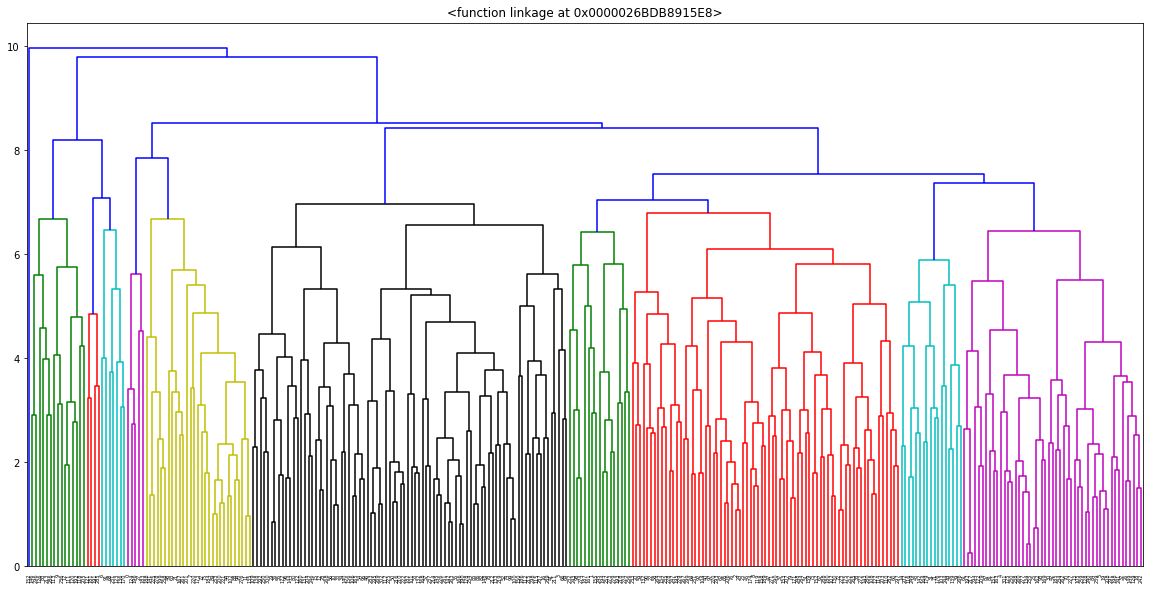

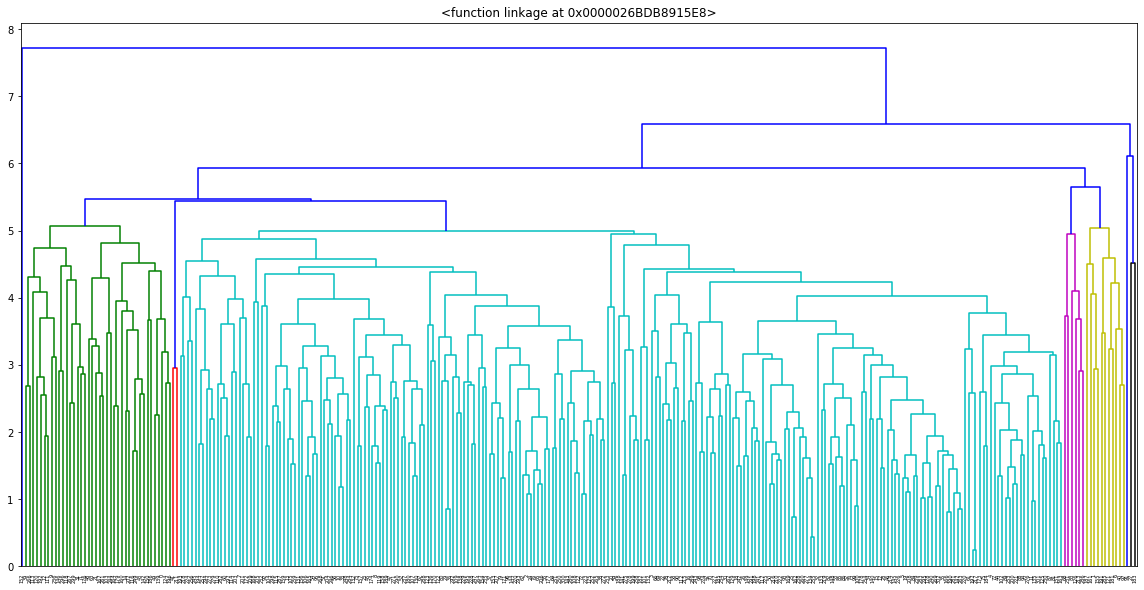

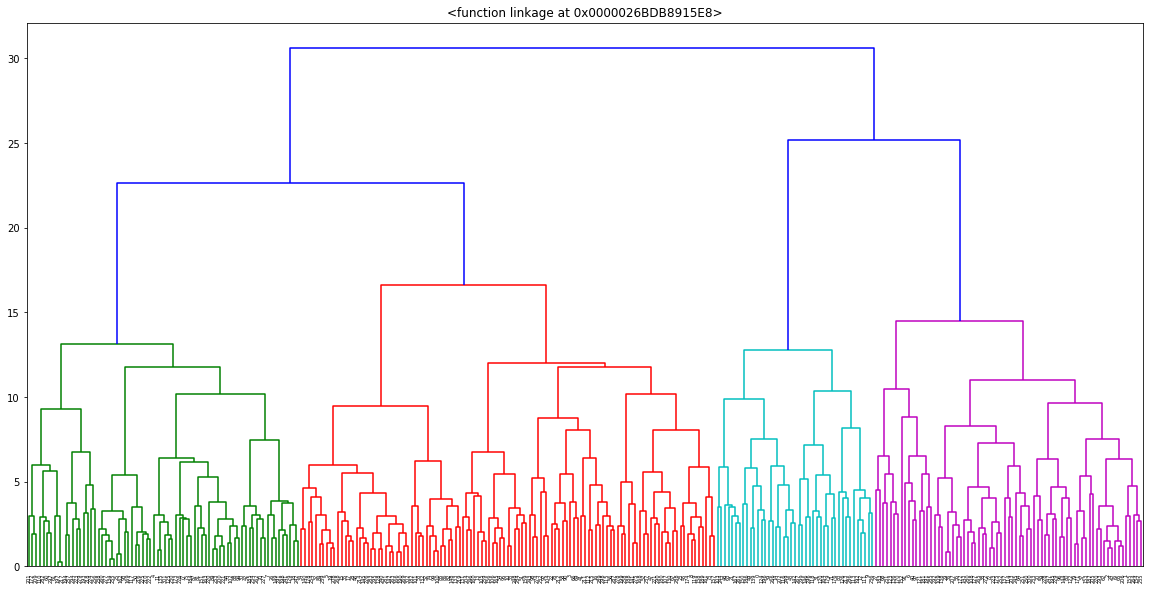

<IPython.core.display.Javascript object>

In [6]:
linkages = ["complete", "average", "ward"]
for link in linkages:
    plt.figure(figsize=(20, 10))
    dendrogram(linkage(X_std, method=link))
    plt.title(linkage)
    plt.show()

Looking purely at these diagrams, ward looks the best purely on aesthetics. Average might get a more accurate picture between two groups. It's tough to say

In [26]:
for link in linkages[:2]:
    agg_cluster = AgglomerativeClustering(linkage=link, affinity="cosine", n_clusters=2)
    clusters = agg_cluster.fit_predict(X_std)
    ari = metrics.adjusted_rand_score(y, clusters)
    sil = metrics.silhouette_score(X_std, clusters, metric="euclidean")

    print(f"For {link} the ARI: {ari} / Silhouette {sil}")

agg_cluster = AgglomerativeClustering(
    linkage="ward", affinity="euclidean", n_clusters=2
)
clusters = agg_cluster.fit_predict(X_std)
ari = metrics.adjusted_rand_score(y, clusters)
sil = metrics.silhouette_score(X_std, clusters, metric="euclidean")

print(f"For ward the ARI: {ari} / Silhouette {sil}")

For complete the ARI: 0.21394030618551016 / Silhouette 0.11730765444448985
For average the ARI: 0.2940490133353465 / Silhouette 0.14837359969689895
For ward the ARI: 0.146129913123814 / Silhouette 0.1387197366557222


<IPython.core.display.Javascript object>

Both complete and average performed identically with a terrible ARI but a decent silhouette score. Ward, while having a worse silhouette, has a much better ARI